import necessary libraries for predicting the wine quality accuracy and to visualize the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing the wine data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


the following code describe whats in the data set

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


first spitting the data into two x as a features and y as a variables.
training the data and testing the data by taking the random data set of 42.
initializing decision tree as a classifier by splitting the data into two variables.
now predicting the accuracy by displaying

In [ ]:

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.559375
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



After predicting the accuracy, now we will visualize the data using different techniques.

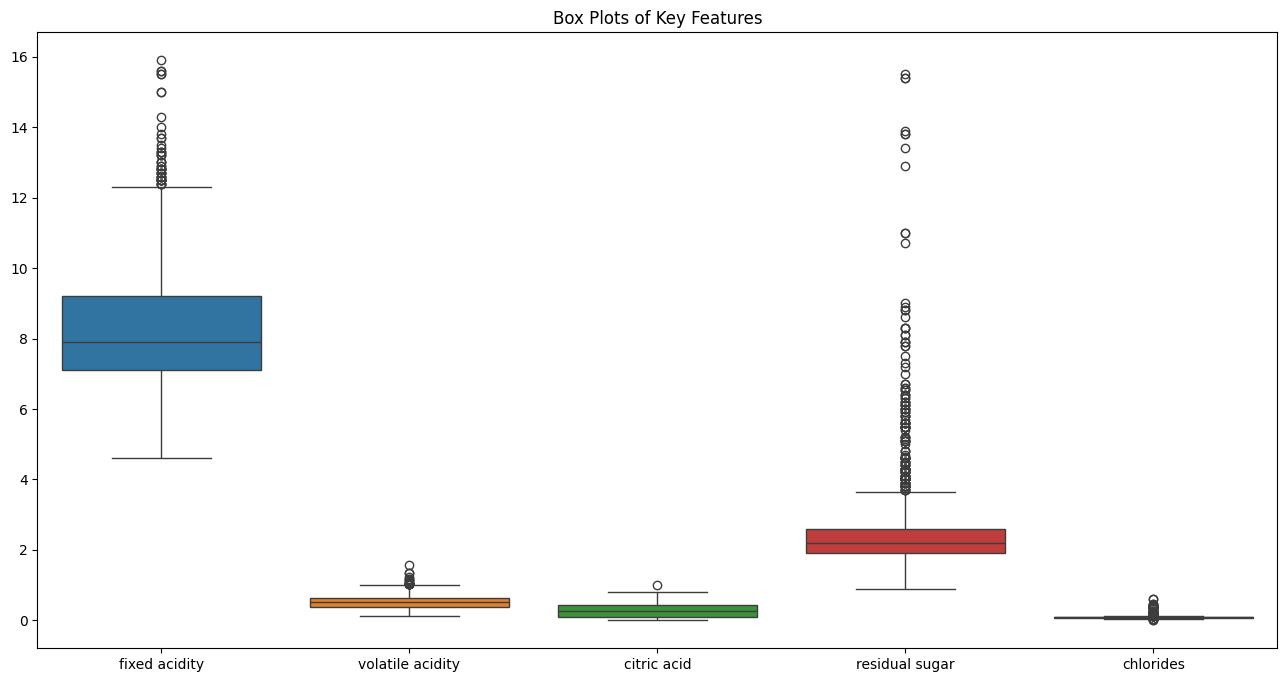

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']])
plt.title("Box Plots of Key Features")
plt.show()


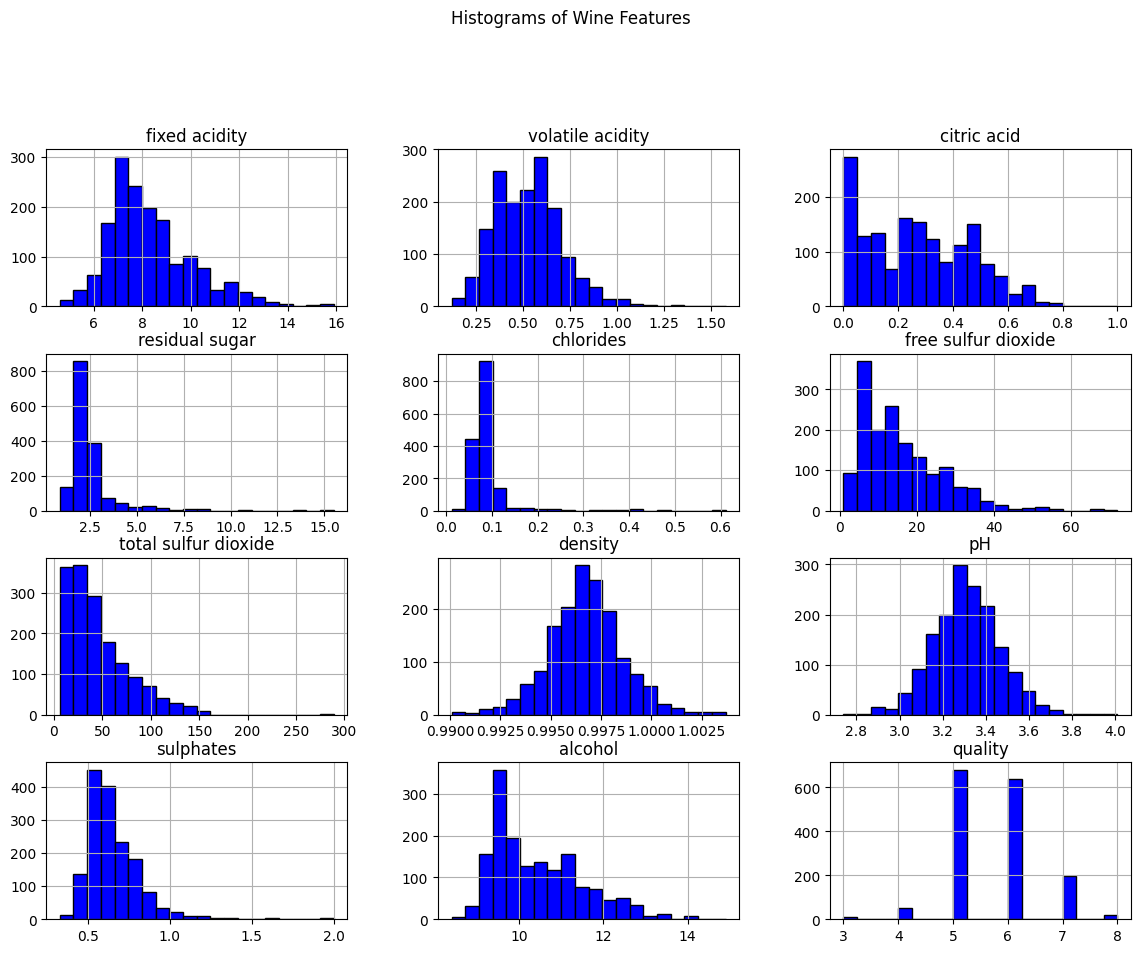

In [ ]:
data.hist(figsize=(14, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Wine Features", y=1.02)
plt.show()


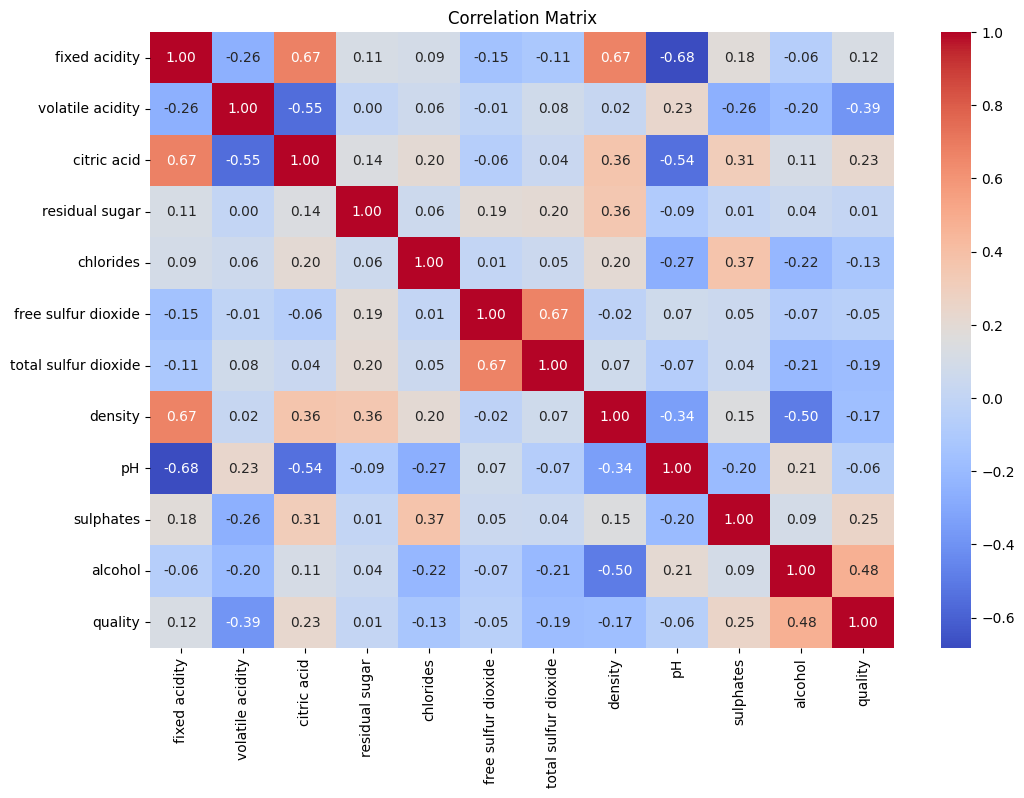

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


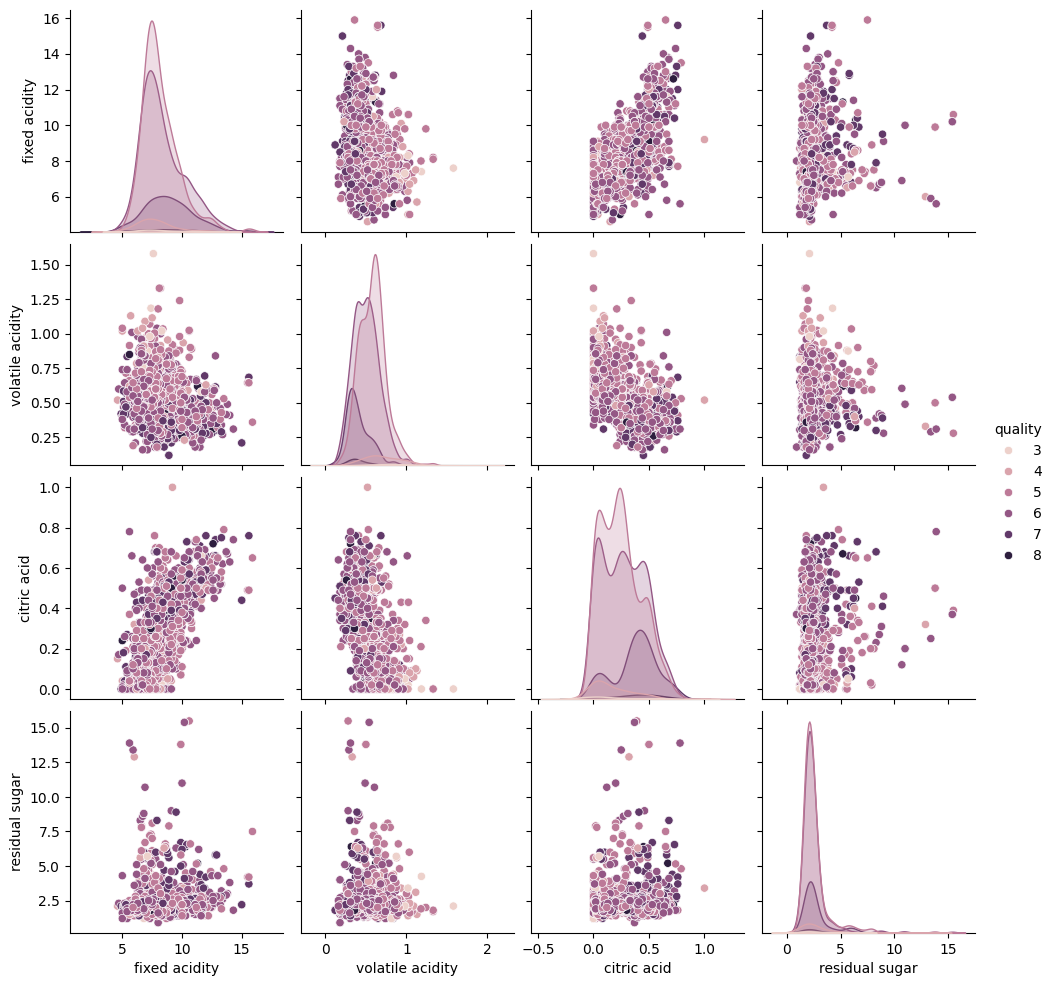

In [ ]:
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']
sns.pairplot(data[selected_features], hue='quality', diag_kind='kde')
plt.show()


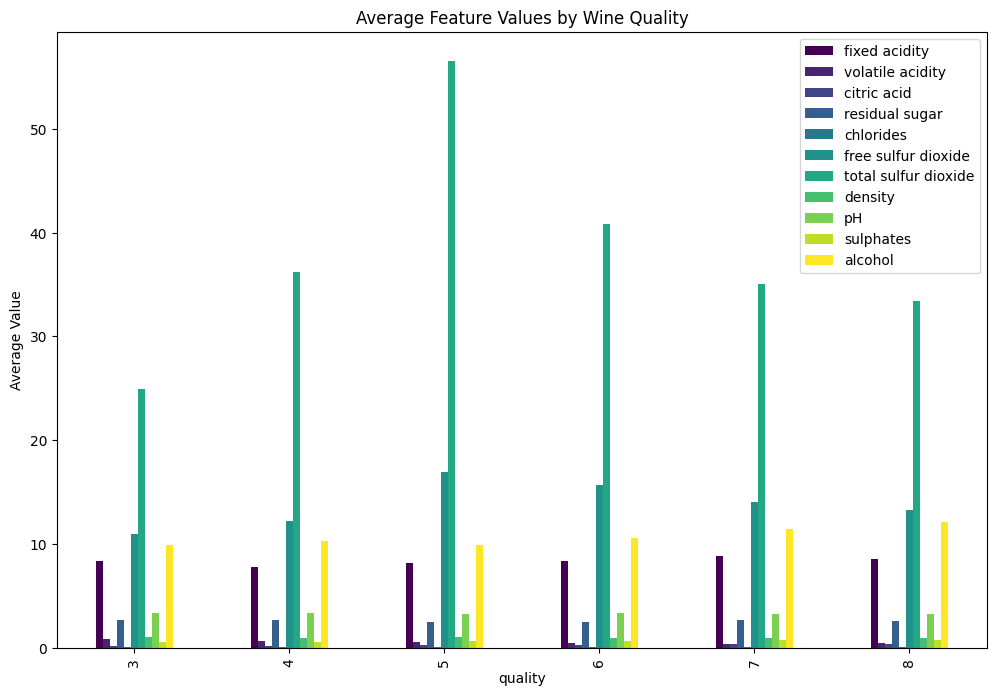

In [ ]:
avg_values_by_quality = data.groupby('quality').mean()
avg_values_by_quality.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title("Average Feature Values by Wine Quality")
plt.ylabel("Average Value")
plt.show()
